In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setting 1

Take $d=400, s=5$, $K=3$ and $T=20000$. The contexts are sampled from $N(0,\Sigma)$, where $\Sigma$ is autoregressive with $\sigma=1.0$ and $\rho=0.1$. The noise sd is $0.1$. We repeat the experiment with $\epsilon=0.5, 1.0, 2.0, 5.0, 10.0$. We compare with (i) random bandit (pick each action randomly) - this has complete privacy but no utility worth and (ii) sparsity agnostic bandit - this has utility worth (for high-dimensional sparse bandit) but no privacy guarantees.

Choices for hyperparameters: $\eta=10^{-5}$ and $M_\ell = M \log (b_{\max} N_\ell)$, where $M$ is chosen as 1.4 arbitrarily (this hyperparameter tuning can be tricky in practice).

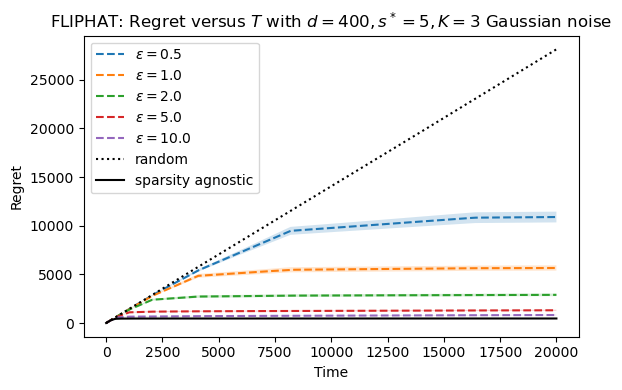

In [6]:
regret_vs_time_eps = np.load('simulations/result_AR1e-1-d400-s5-T40000-K3.npy')
eps = [0.5, 1.0, 2.0, 5.0, 10.0]
n_reps, _, T = regret_vs_time_eps.shape
avg_regret_time = regret_vs_time_eps.mean(axis=0)
sd_regret_time = regret_vs_time_eps.std(axis=0)

plt.figure(figsize=(6,4))
for i in range(5):
    plt.plot(range(T), avg_regret_time[i+2], label=f'$\epsilon=${eps[i]}', linestyle='dashed')
    plt.fill_between(range(T), avg_regret_time[i+2] - 1.96 * sd_regret_time[i+2]/np.sqrt(n_reps), avg_regret_time[i+2] + 1.96 * sd_regret_time[i+2]/np.sqrt(n_reps), alpha=0.2)


plt.plot(range(T), avg_regret_time[0], label=f'random', linestyle='dotted', color='black')
plt.plot(range(T), avg_regret_time[1], label=f'sparsity agnostic', linestyle='solid', color='black')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.legend()
plt.title('FLIPHAT: Regret versus $T$ with $d=400, s^*=5, K=3$ Gaussian noise')
plt.tight_layout()
# plt.savefig('plot_AR1e-1-d400-s5-T40000-K3.pdf')
plt.show()

## Setting 2 - effect of $d$

Same setting as setup 1 - with $d$ taken over 10 values ranging in $[400, 4000]$. 

Using `sklearn` to estimate $\beta$ such that $R_T(d) \approx \alpha + \beta \log (d)$ where $R_T(d)$ is the regret accumulated till $T=10000$ for context dimension $d$.

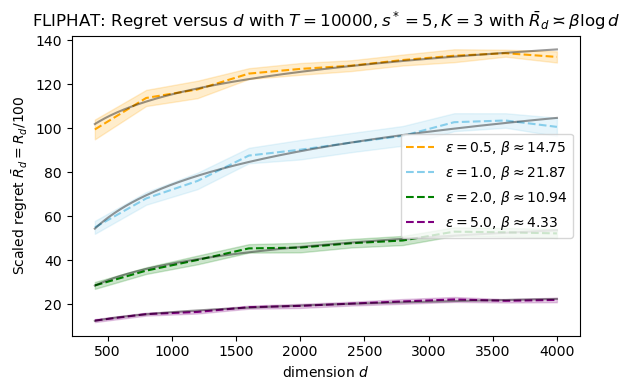

In [7]:
regret_vs_dim_eps = np.load('simulations/result_AR1e-1-s5-T40000-K3-effect_d.npy')
avg_regret_d = regret_vs_dim_eps.mean(axis=1)
sd_regret_d = regret_vs_dim_eps.std(axis=1)

d_list = np.linspace(400, 4000, 10).astype(np.int32)
eps = [0.5, 1.0, 2.0, 5.0]

from sklearn.linear_model import LinearRegression
ds = np.log(np.linspace(400, 4000, 500).reshape(-1,1))
colors = ['orange', 'skyblue', 'green', 'purple']
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(4):
    
    X = np.log(np.array(list(d_list) * 50).reshape(-1,1))
    y = regret_vs_dim_eps[:,:,i].flatten('F') / 100
    reg = LinearRegression().fit(X, y)
    pred_x = reg.predict(ds)
    
    plt.plot(d_list, avg_regret_d[:,i]/100, label=f'$\epsilon=${eps[i]}, $\\beta \\approx {reg.coef_[0]:.2f}$', color=colors[i], linestyle='dashed')
    plt.plot(np.exp(ds), pred_x, color='black', alpha=0.4)
    plt.fill_between(d_list, avg_regret_d[:,i]/100 - 1.96 * sd_regret_d[:,i]/(100*np.sqrt(50)), avg_regret_d[:,i]/100 + 1.96 * sd_regret_d[:,i]/(100*np.sqrt(50)), color=colors[i], alpha=0.2)
    
    
plt.xlabel('dimension $d$')
plt.ylabel('Scaled regret $\\bar{R}_d = R_d/100$')
plt.legend()
plt.title('FLIPHAT: Regret versus $d$ with $T=10000, s^*=5, K=3$ with $\\bar{R}_d\\asymp \\beta \log d$')
plt.tight_layout()
# plt.savefig('plot_AR1e-1-s5-T40000-K3-effect_d.pdf')
plt.show()

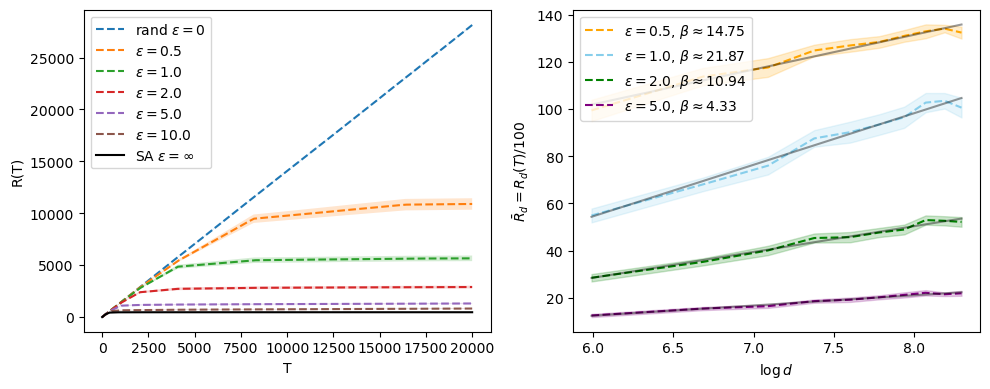

In [8]:
### Reconstructing the plot in main text

eps = [0.5, 1.0, 2.0, 5.0]
K = 3
s = 5
d_list = np.linspace(400, 4000, 10).astype(np.int32)
avg_regret_d = regret_vs_dim_eps.mean(axis=1)
sd_regret_d = regret_vs_dim_eps.std(axis=1)

from sklearn.linear_model import LinearRegression
ds = np.log(np.linspace(400, 4000, 500).reshape(-1,1))
colors = ['orange', 'skyblue', 'green', 'purple']
eps1 = [0.5, 1.0, 2.0, 5.0, 10.0]
n_reps, _, T = regret_vs_time_eps.shape
avg_regret_time = regret_vs_time_eps.mean(axis=0)
sd_regret_time = regret_vs_time_eps.std(axis=0)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

#ax1.plot(range(T), avg_regret_time[0], label=f'random $\epsilon=0$', linestyle='dotted', color='black')
#ax1.fill_between(range(T), avg_regret_time[0] - 1.96 * sd_regret_time[0]/np.sqrt(n_reps), avg_regret_time[0] + 1.96 * sd_regret_time[0]/np.sqrt(n_reps), alpha=0.2)
for i in range(7):
    if i != 1:
        if i == 0:
            text = 'rand $\epsilon=0$'
        else:
            text = f'$\epsilon=${eps1[i-2]}'
        ax1.plot(range(T), avg_regret_time[i], label=text, linestyle='dashed')
        ax1.fill_between(range(T), avg_regret_time[i] - 1.96 * sd_regret_time[i]/np.sqrt(n_reps), avg_regret_time[i] + 1.96 * sd_regret_time[i]/np.sqrt(n_reps), alpha=0.2)

ax1.plot(range(T), avg_regret_time[1], label=f'SA $\epsilon=\infty$', linestyle='solid', color='black')
ax1.fill_between(range(T), avg_regret_time[1] - 1.96 * sd_regret_time[1]/np.sqrt(n_reps), avg_regret_time[1] + 1.96 * sd_regret_time[1]/np.sqrt(n_reps), alpha=0.2)
ax1.set_xlabel('T')
ax1.set_ylabel('R(T)')
ax1.legend()
#plt.title('FLIPHAT: Regret versus $T$ with $d=400, s^*=5, K=3$ Gaussian noise')
#plt.tight_layout()
#plt.savefig('plot_AR1e-1-d400-s5-T40000-K3.pdf')
#plt.show()

for i in range(4):
    
    X = np.log(np.array(list(d_list) * 50).reshape(-1,1))
    y = regret_vs_dim_eps[:,:,i].flatten('F') / 100
    reg = LinearRegression().fit(X, y)
    pred_x = reg.predict(ds)
    
    ax2.plot(np.log(d_list), avg_regret_d[:,i]/100, label=f'$\epsilon=${eps[i]}, $\\beta \\approx {reg.coef_[0]:.2f}$', color=colors[i], linestyle='dashed')
    ax2.plot(ds, pred_x, color='black', alpha=0.4)
    ax2.fill_between(np.log(d_list), avg_regret_d[:,i]/100 - 1.96 * sd_regret_d[:,i]/(100*np.sqrt(50)), avg_regret_d[:,i]/100 + 1.96 * sd_regret_d[:,i]/(100*np.sqrt(50)), color=colors[i], alpha=0.2)
    
    
ax2.set_xlabel('$\log d$')
ax2.set_ylabel('$\\bar{R}_d = R_d(T)/100$')
ax2.legend()
#plt.title('FLIPHAT: Regret versus $d$ with $T=10000, s^*=5, K=3$ with $\\bar{R}_d\\asymp \\beta \log d$')
plt.tight_layout()
# plt.savefig('plot_AR1e-1-s5-T40000-K3-gaussian-effect_d_new.pdf')
plt.show()

On the left is $R_T$ versus $T$ for fixed context dimension $d$ (different algorithms). On the right is $R_T(d)$ (scaled) versus $\log (d)$ for different choices of privacy parameters for FLIPHAT.

## Setting 3
​
Take same setting as in 1. The noise is $U(-0.1,0.1)$. We repeat the experiment with $\epsilon=0.5, 1.0, 2.0, 5.0, 10.0$. We compare with (i) random bandit (pick each action randomly) - this has complete privacy but no utility worth and (ii) sparsity agnostic bandit - this has utility worth (for high-dimensional sparse bandit) but no privacy guarantees.
​
Choices for hyperparameters: $\eta=10^{-5}$ and $M_\ell = M \log (b_{\max} N_\ell)$, where $M$ is chosen as 1.4 arbitrarily (this hyperparameter tuning can be tricky in practice).

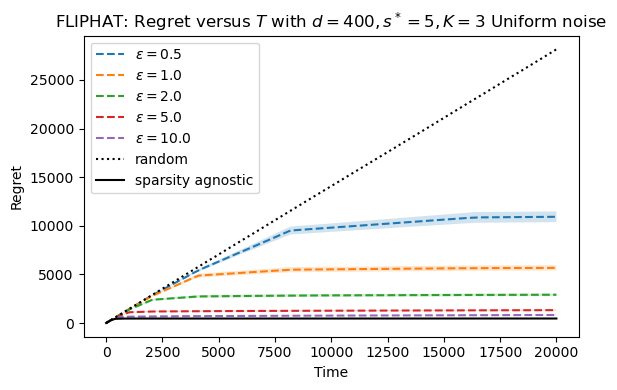

In [9]:
regret_vs_time_eps = np.load('simulations/result_AR1e-1-d400-s5-T40000-K3-unif_noise.npy')
eps = [0.5, 1.0, 2.0, 5.0, 10.0]
n_reps, _, T = regret_vs_time_eps.shape
avg_regret_time = regret_vs_time_eps.mean(axis=0)
sd_regret_time = regret_vs_time_eps.std(axis=0)

plt.figure(figsize=(6,4))
for i in range(5):
    plt.plot(range(T), avg_regret_time[i+2], label=f'$\epsilon=${eps[i]}', linestyle='dashed')
    plt.fill_between(range(T), avg_regret_time[i+2] - 1.96 * sd_regret_time[i+2]/np.sqrt(n_reps), avg_regret_time[i+2] + 1.96 * sd_regret_time[i+2]/np.sqrt(n_reps), alpha=0.2)


plt.plot(range(T), avg_regret_time[0], label=f'random', linestyle='dotted', color='black')
plt.plot(range(T), avg_regret_time[1], label=f'sparsity agnostic', linestyle='solid', color='black')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.legend()
plt.title('FLIPHAT: Regret versus $T$ with $d=400, s^*=5, K=3$ Uniform noise')
plt.tight_layout()
# plt.savefig('plot_AR1e-1-d400-s5-T40000-K3-unif.pdf')
plt.show()

## Setting 4

Here we study the effect of the hyperparameter $s$. We use the Gaussian noise again (same setting as setting 1 but $s^*=10$ now), but with true sparsity $s^*=10$. We use $s$ in $[2, 24]$ at steps of 2 (12 values). 

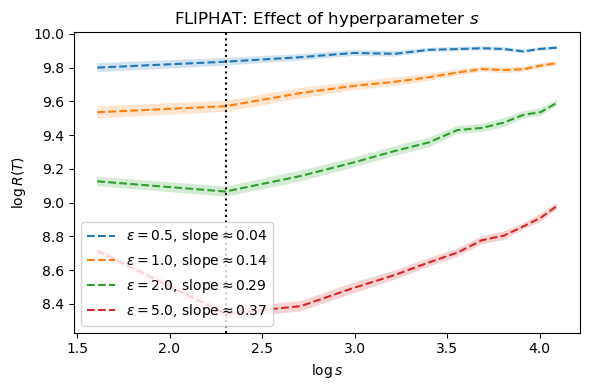

In [12]:
regret_vs_s_eps = np.load('simulations/result_tuning_s_new.npy')

s_list = (np.arange(12, dtype=np.int16)+1)*5
eps = [0.5, 1.0, 2.0, 5.0]
avg_regret_time = regret_vs_s_eps.mean(axis=0)
sd_regret_time = regret_vs_s_eps.std(axis=0)

plt.figure(figsize=(6,4))
for i in range(4):
    
    X = np.log(s_list[1:]).reshape(-1,1)
    y = np.log(avg_regret_time[i,1:])
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_
    plt.plot(np.log(s_list), np.log(avg_regret_time[i]), label=f'$\\epsilon=${eps[i]}, slope$\\approx${slope[0]:.2f}', linestyle='dashed')
    plt.fill_between(np.log(s_list), np.log(avg_regret_time[i] - 1.96 * sd_regret_time[i]/np.sqrt(n_reps)), np.log(avg_regret_time[i] + 1.96 * sd_regret_time[i]/np.sqrt(n_reps)), alpha=0.2)
    

plt.axvline(x=np.log(10), color='black', linestyle='dotted')
plt.xlabel('$\log s$')
plt.ylabel('$\log R(T)$')
plt.legend()
plt.title('FLIPHAT: Effect of hyperparameter $s$')
plt.tight_layout()
# plt.savefig('plot_effect_s_new.pdf')
plt.show()

## Setting 5: Effect of $K$

Same setting as 1, trying with $\epsilon\in \{0.5, 1.0, 2.0, 5.0\}$ and $K$ ranging from 2 to 24 step of 2 (12 values) - reporting regret at time $T=10000$.

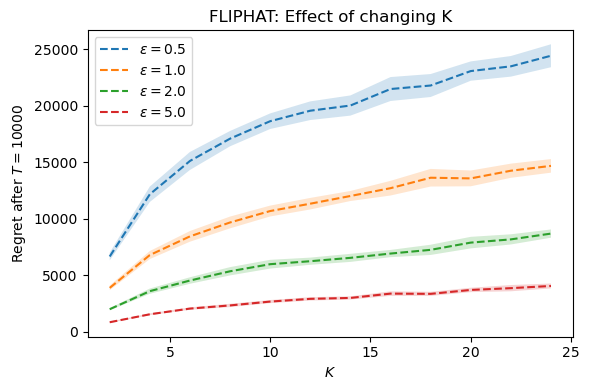

In [13]:
K_list = (np.arange(12, dtype=np.int16)+1)*2
regret_vs_K_eps = np.load('simulations/result_effect_K.npy')
n_reps=36
eps = [0.5, 1.0, 2.0, 5.0]
avg_regret_time = regret_vs_K_eps[:36].mean(axis=0)
sd_regret_time = regret_vs_K_eps[:36].std(axis=0)

plt.figure(figsize=(6,4))
for i in range(4):
    plt.plot(K_list, avg_regret_time[i], label=f'$\\epsilon=${eps[i]}', linestyle='dashed')
    plt.fill_between(K_list, avg_regret_time[i] - 1.96 * sd_regret_time[i]/np.sqrt(n_reps), avg_regret_time[i] + 1.96 * sd_regret_time[i]/np.sqrt(n_reps), alpha=0.2)
plt.xlabel('$K$')
plt.ylabel('Regret after $T=10000$')
plt.legend()
plt.title('FLIPHAT: Effect of changing K')
plt.tight_layout()
# plt.savefig('plot_effect_K.pdf')
plt.show()